In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
rs =123 

In [29]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [30]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = rs)

In [32]:
max_k = 50
f1_scores = []

In [33]:
for k in range(1, max_k + 1):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9091
2,0.9756
3,0.9639
4,0.9512
5,0.9524
6,0.9524
7,0.9412
8,0.9412
9,0.9302


Text(0.5, 1.0, 'KNN F1 Score')

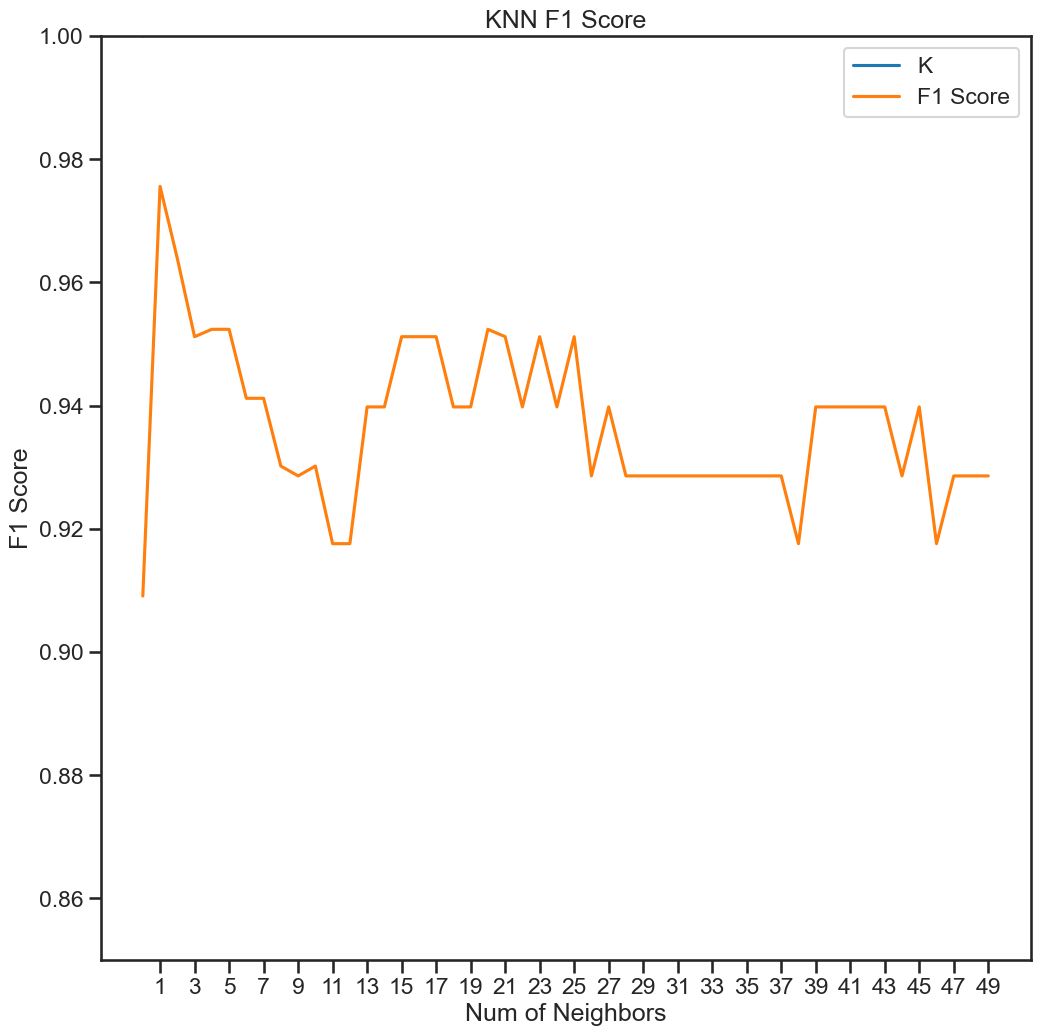

In [34]:
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

<Figure size 1920x1440 with 0 Axes>

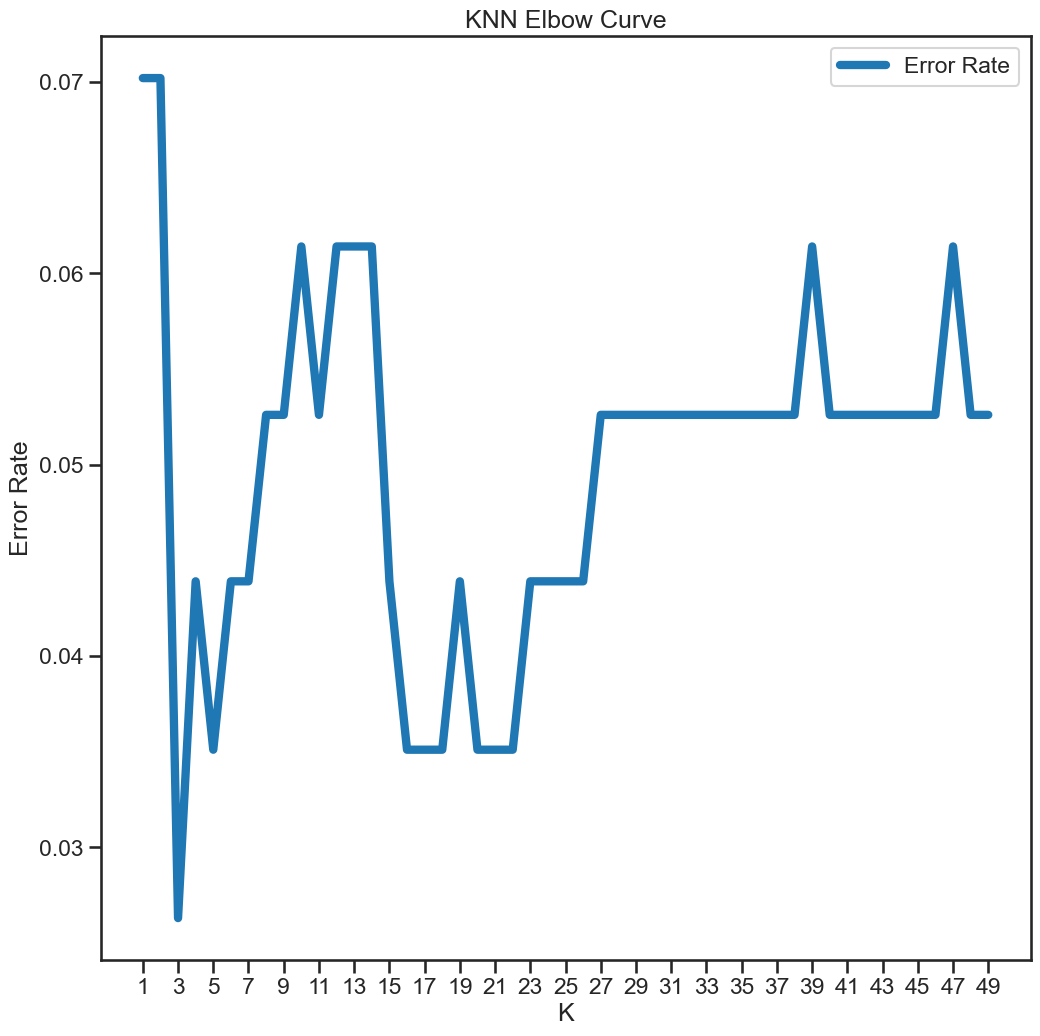

In [35]:
max_k = 50
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [37]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [38]:
preds = knn_model.predict(X_test)

In [39]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [40]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9824561403508771,
 'recall': 0.9523809523809523,
 'precision': 1.0,
 'f1score': 0.975609756097561}

GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [2],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=9, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate on training data
y_train_pred = best_knn.predict(X_train)
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = best_knn.predict(X_test)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Print final accuracies
print("\nTraining Accuracy:", best_knn.score(X_train, y_train))
print("Test Accuracy:", best_knn.score(X_test, y_test))


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9649237472766884

Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       1.00      0.94      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455


Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Training Accuracy: 0.978021978021978
Test Accuracy: 0.9824561403508771


In [42]:
from sklearn.datasets import load_iris
import joblib 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
joblib.dump(best_knn, 'model.pkl')
joblib.dump(ss, 'scaler.pkl')

['scaler.pkl']

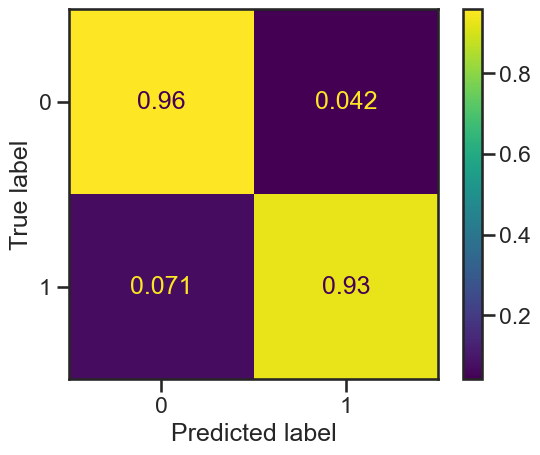

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

cf = confusion_matrix(y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=best_knn.classes_)
disp.plot()
plt.show()

In [44]:
#from imblearn.over_sampling import RandomOverSampler, SMOTE

In [45]:
#smote_sampler = SMOTE(random_state = rs)

In [46]:
#X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

In [47]:
#y_smo.value_counts().plot.bar(color=['green', 'red'])

In [48]:
#best_knn.fit(X_smo, y_smo)
#preds = best_knn.predict(X_test)

In [49]:
'''from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision_test, recall_test, f_beta_test, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
accuracy_test = accuracy_score(y_test, preds)
train_preds = knn.predict(X_train)
precision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average='binary')
accuracy_train = accuracy_score(y_train, train_preds)


print("Test Set Results:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F-Score: {f_beta_test:.2f}")


print("\nTraining Set Results:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F-Score: {f_beta_train:.2f}")
'''

'from sklearn.metrics import precision_recall_fscore_support, accuracy_score\n\nprecision_test, recall_test, f_beta_test, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average=\'binary\')\naccuracy_test = accuracy_score(y_test, preds)\ntrain_preds = knn.predict(X_train)\nprecision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average=\'binary\')\naccuracy_train = accuracy_score(y_train, train_preds)\n\n\nprint("Test Set Results:")\nprint(f"Accuracy: {accuracy_test:.2f}")\nprint(f"Precision: {precision_test:.2f}")\nprint(f"Recall: {recall_test:.2f}")\nprint(f"F-Score: {f_beta_test:.2f}")\n\n\nprint("\nTraining Set Results:")\nprint(f"Accuracy: {accuracy_train:.2f}")\nprint(f"Precision: {precision_train:.2f}")\nprint(f"Recall: {recall_train:.2f}")\nprint(f"F-Score: {f_beta_train:.2f}")\n'

In [50]:
joblib.dump(x.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']

In [51]:
from fastapi import FastAPI
from pydantic import BaseModel